In [1]:
from cospar import reader, F, paramkeys, datakeys

In [4]:
from everest.h5anchor import Reader, Fetch

In [27]:
paramCut = reader[(Fetch('*/f') == 1) & (Fetch('*/aspect') == 1)]
freq1Cut = paramCut & reader[Fetch('*/temperatureField') == '_built_peaskauslu-thoesfthuec']
freq2Cut = paramCut & reader[Fetch('*/temperatureField') == '_built_oiskeaosle-woatihoo']
isoCut = paramCut << (freq1Cut | freq2Cut)

In [29]:
isoCut

Scope(
('scioswngiush-angoubliah', '...')
('uedweiklear-thoablsnufr', '...')
('wrodsnikr-botwyuez', '...')
)

In [37]:
datas = sorted(reader[isoCut : ('tauRef', 't', 'Nu')].values())

In [47]:
import math

from everest.window import Canvas
from everest.window.data import Data
%matplotlib inline

In [68]:
canvas = Canvas(
    size = (12, 6),
    facecolour = 'white',
    )
ax = canvas.make_ax()
tauRefs = []
for tauRef, t, Nu in datas:
    tauRefs.append(math.log10(tauRef))
    ax.line(
        Data(t, label =  'Dimensionless time'),
        Data(Nu, label = 'Nusselt number'),
        )
    ax.axes.title = 'MS98 reproduction: isoviscous initial conditions'
    ax.axes.colour = 'black'
    ax.ticks.x.colour = 'black'
    ax.ticks.y.colour = 'black'
    ax.grid.colour = 'grey'

ax = canvas.axs[0][0][0]
legendHandles = [r[0] for r in ax.collections]
legendLabels = [str(round(v, 1)) for v in tauRefs]
handles, labels = zip(*sorted(zip(legendHandles, legendLabels), key = lambda r: r[-1]))
legend = ax.ax.legend(
    handles,
    labels,
    loc = 'right',
    framealpha = 1.,
    labelcolor = 'black',
    facecolor = 'white',
    frameon = True,
    title = 'Yield stress \n(10^n)',
    bbox_to_anchor = (0.988, 0.85),
    )
legend.properties()['title'].set_color('black')
legend.get_frame().set_edgecolor('black')

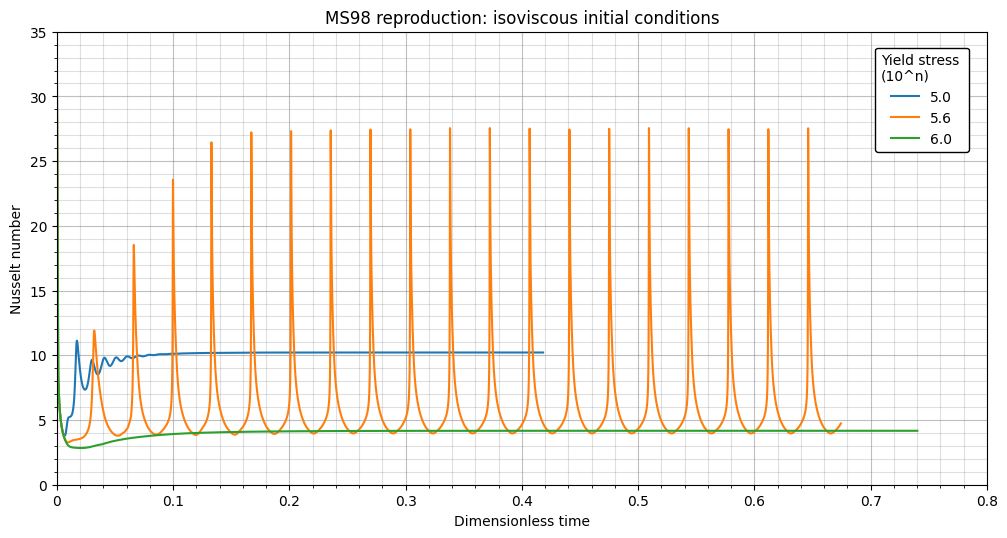

In [69]:
canvas.show()